# Proyecto del Día 9: Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Consigna

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo descargable de esta lección.
2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior.
3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año.
4. Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

**¡Mucha suerte!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [2]:
df = pd.read_csv('../Datos+Meteorológicos_Arg_2023.csv')

In [3]:
# Changes in data types
df["Fecha"] = pd.to_datetime(df["Fecha"],format="%d/%m/%Y")

# Creating Month and Year cols
df["Month"] = df["Fecha"].dt.month
df["Year"] = df["Fecha"].dt.year

# Optimizations in memory usage
df["Ciudad"] = df["Ciudad"].astype("category")
df["Month"] = df["Month"].astype("category")
df["Year"] = df["Year"].astype("category")

In [4]:
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa,Month,Year
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8,1,2023
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7,1,2023
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0,1,2023
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8,1,2023
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9,1,2023
...,...,...,...,...,...,...,...,...,...
1820,2023-12-31,Buenos Aires,15,12,0.0,17.9,49.2,12,2023
1821,2023-12-31,Cordoba,15,7,0.0,17.8,62.4,12,2023
1822,2023-12-31,Rosario,14,8,0.0,38.2,31.2,12,2023
1823,2023-12-31,Mendoza,13,9,84.8,27.6,35.3,12,2023


In [29]:
class WeatherApp:
    
    def __init__(self):
        self.keep_running = True
        self.cities = pd.unique(df["Ciudad"])
        self.years = pd.unique(df["Year"])
        self.months = pd.unique(df["Month"])
        
        self.user_city = None
        self.user_year = None
        self.user_month = None
        self.df_user = pd.DataFrame()

        self.months_dic = {
            "months_str":["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dic"],
            "months_num":self.months
        }

    def show_welcome(self):
        print("Welcome to weather app.")
    
    def show_cities(self):
        print("Select a number check the weather of the selected city")
        for idx, city in enumerate(self.cities):
            print(f"{idx} -> {city}")

    def show_years(self):
        print("Select a year")
        for idx, year in enumerate(self.years):
            print(f"{idx} -> {year}")

    def show_months(self):
        print("Select a month")
        for idx, month in enumerate(self.months):
            print(f"{idx+1} -> {month}")

    def select_city(self):
        try:
            choice = int(input("Your choise: "))
            if 0 <= choice < len(self.cities):
                self.user_city = self.cities[choice]
            else:
                print("")
                print("Invalid choice. Try again.")
                print("")
                self.user_city = None
        except:
            print("")
            print("Invalid choice. Try again.")
            print("")
            self.user_city = None


    def select_year(self):
        try:
            choice = int(input("Your choise: "))
            if 0 <= choice < len(self.years):
                self.user_year = self.years[choice]
            else:
                print("")
                print("Invalid choice. Try again.")
                print("")
                self.user_year= None
        except:
            print("")
            print("Invalid choice. Try again.")
            print("")
            self.user_year = None
            
    def select_month(self):
        try:
            choice = int(input("Your choise: "))
            if 1 <= choice < len(self.months)+1:
                self.user_month = choice
            else:
                print("")
                print("Invalid choice. Try again.")
                print("")
                self.user_month= None
        except:
            print("")
            print("Invalid choice. Try again.")
            print("")
            self.user_month = None

    
    def crop_df(self):
        self.df_user = df[(df["Ciudad"] == self.user_city) & (df["Year"] == self.user_year) & (df["Month"] == self.user_month)]

    def show_plot(self):
        #Get data from cropped DF (df_user)
        tspan = self.df_user["Fecha"]
        min_temps = self.df_user["Temperatura Minima"]
        max_temps = self.df_user["Temperatura Maxima"]
        # Set some configs for axis
        xti = pd.date_range(tspan.min(), tspan.max(), periods=5)

        # Make plot
        figure = plt.figure(figsize=[10,7])
        p1 = plt.plot(tspan,min_temps,'bo--', label="Mínima")
        p2 = plt.plot(tspan,max_temps,'ro--', label="Máxima")
        plt.grid()
        plt.title(f"Temperatures vs time in {self.user_city} @ {self.months_dic["months_str"][self.user_month-1]}")
        plt.legend()
        plt.xlabel("Fechas")
        plt.ylabel("[ºC]")
        plt.xticks(xti)        
        plt.show()


    def ask_keep_running(self):
        is_ok = False
        while not is_ok:
            try:
                print("")
                print("""Do you want to continue reviewing another city or month? 
                0. Terminate
                1. Continue
                """)
                
                choice = int(input("Your choice: "))
                if 0<= choice <= 1:
                    is_ok = True
                    self.keep_running = choice
                    self.restart()
            except:
                print("Wrong choice. Let's try again.")

    def restart(self):
        self.user_city = None
        self.user_year = None
        self.user_month = None
            
    def run(self):
        while self.keep_running:
            
            self.show_welcome()
            if self.user_city == None: 
                self.show_cities()
                self.select_city()
            
            else:
                if self.user_year == None:
                    self.show_years()
                    self.select_year()
                
                else:
                    if self.user_month == None:
                        self.show_months()
                        self.select_month()
                    else:
                        self.crop_df()
                        self.show_plot()
                        self.ask_keep_running()  

Welcome to weather app.
Select a number check the weather of the selected city
0 -> Buenos Aires
1 -> Cordoba
2 -> Rosario
3 -> Mendoza
4 -> Tucuman


Your choise:  0


Welcome to weather app.
Select a year
0 -> 2023


Your choise:  0


Welcome to weather app.
Select a month
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9
10 -> 10
11 -> 11
12 -> 12


Your choise:  1


Welcome to weather app.


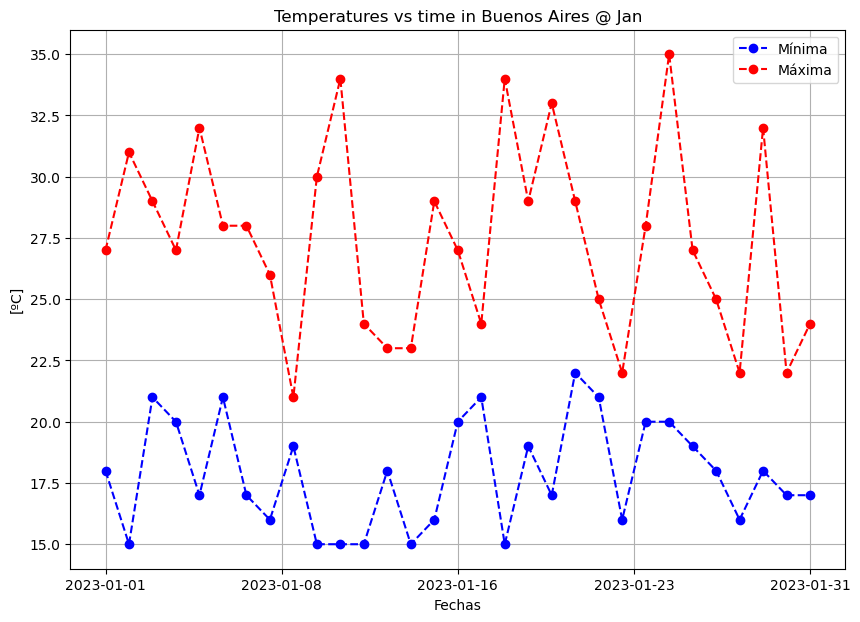


Do you want to continue reviewing another city or month? 
                0. Terminate
                1. Continue
                


In [ ]:
app = WeatherApp()
app.run()